<a href="https://colab.research.google.com/github/Guillaume-mcgill/school/blob/main/ECSE415_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT 3: Advanced computer vision**

Guillaume Rodier
[260975661]

In [ ]:
# IMPORTS

from google.colab import drive
import numpy as np

# for the neural network
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch

# to save the neural network models
from google.colab import files

# to output images
import matplotlib.pyplot as plt

# to output a table
import pandas as pd

# to import the images
import cv2

In [ ]:
# mount google drive
drive.mount('/content/drive')

# Define the path variable
path = '/content/drive/My Drive/UNIVERSITY/ECSE415/Assignment3/Assignment3/'

Mounted at /content/drive


### **1. Image Classification with Convolution Neural Network (CNN) and Naive Bayes**

***1. Use Pytorch class torchvision.datasets.MNIST to load the dataset. Use batch
size of 32***

In [ ]:
# Set the device to use GPU, this was shown in the tutorial
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# the tutorials were used for loading the data understand how to implement the CNN
# the following website was used as an additional ressource:
# https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118
# Stack Overflow was used to find the mean and standard dev. of the data to normalize it:
# https://stackoverflow.com/questions/63746182/correct-way-of-normalizing-and-scaling-the-mnist-dataset

# transform data to tensor & normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# load the training data
train_set = datasets.MNIST(
            root = 'data',
            train = True,
            transform = transform,
            download = True,
            )

# load the testing data
test_set = datasets.MNIST(
           root = 'data',
           train = False,
           transform = transform,
           download = True
          )

# output the data
print(train_set)
print("\n")
print(test_set)
print("\nshape of train set: ")
print(train_set.data.size())
print("\nshape of labels: ")
print(train_set.targets.size())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

shape of train set: 
torch.Size([60000, 28, 28])

shape of labels: 
torch.Size([60000])


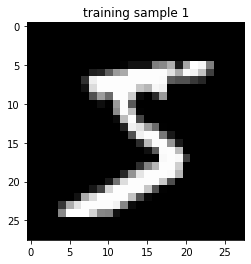

(Text(0.5, 1.0, 'training sample 1'),
 None)

In [ ]:
# To very the data has loaded correctly, load a training sample
plt.title("training sample 1"), plt.imshow(train_set.data[0], cmap='gray'), plt.show()

In [ ]:
# When we load the data, each image is loaded individually, what we want is to load it in batches of size 32
# Loaders are used exactly for this purpose
# this is shown on the following website:
# https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=1),
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=True, num_workers=1)

***2. Implement a CNN with the layers mentioned below:***

* A convolution layer with 32 kernels of size 3 × 3.
* A ReLU activation.
* A convolution layer with 64 kernels of size 3 × 3.
* A ReLU activation.
* A maxpool layer with kernels of size 2 × 2.
* A convolution layer with 64 kernels of size 3 × 3.
* A ReLU activation.
* A convolution layer with 64 kernels of size 3 × 3.
* A ReLU activation.
* A flattening layer. (This layer resizes 2D feature map to a feature vector. The length of
this feature vector should be 4096.)
* A Linear layer with output size of 10

In [ ]:
# The idea of how to implement the structure of a CNN on pytorch was taken from Tutorial 7
# more information on the CNN was found at the PyTorch website:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    # define the convolution layers
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    # define the maxpooling layer
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.flatten = nn.Flatten()

    # define a linear layer
    self.linear = nn.Linear(12544, 10)

    # define the activation function
    self.relu = nn.ReLU()

  def forward(self, x):

    # pass the data through all the layers
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = self.relu(x)
    x = self.conv4(x)
    x = self.relu(x)

    # flatten the ouptut of the convolution layers
    x = x.view(-1, 12544)

    # pass the data through a linear layer
    x = self.linear(x)

    return x

***3.Create an instance of SGD optimizer (stochastic gradient descent) with learning rate of 0.001. Use the default setting
for rest of the hyperparameters. Create an instance of categorical cross entropy criterion***

In [ ]:
# create an instance of the CNN model

# using .to(device) was seen in tutorial 7
net = CNN().to(device)

# display the network
print(net)

optimizer = optim.SGD(net.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion = nn.CrossEntropyLoss()
criterion

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (relu): ReLU()
)


CrossEntropyLoss()

***4. Train the CNN for 10 epochs. Display loss and accuracy in each training step***

In [ ]:
# Tutorial 7 was used for the implementation of the training loop.
# As well, this website was used for additional information:
# https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

# put network in training mode
net.train()

num_epochs = 10

for epoch in range(num_epochs):

  running_loss = 0.0
  total = 0.0
  correct = 0.0

  for i, data in enumerate(train_loader[0]):
    (images,labels) = data

    # move labels and images to device
    images = images.to(device)

    # reset gradient to zero before next batch
    optimizer.zero_grad()

    # forward pass
    outputs = net.forward(images)
    loss = criterion(outputs, labels)

    # backward pass
    loss.backward()
    optimizer.step()

    # update the running loss
    running_loss += loss.item()

    # get the predicted class (maximum value of outputs)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    # print statistics
    if i % 100 == 99:
      avg_loss = running_loss/100
      acc = 100*correct/total
      print('[Epoch %d, Batch %5d] loss: %.3f, accuracy: %.2f %%' %
            (epoch + 1, i + 1, avg_loss, acc))
      running_loss = 0.0
      total = 0.0
      correct = 0.0

[Epoch 1, Batch   100] loss: 2.300, accuracy: 18.75 %
[Epoch 1, Batch   200] loss: 2.296, accuracy: 22.00 %
[Epoch 1, Batch   300] loss: 2.292, accuracy: 29.12 %
[Epoch 1, Batch   400] loss: 2.286, accuracy: 33.19 %
[Epoch 1, Batch   500] loss: 2.279, accuracy: 40.59 %
[Epoch 1, Batch   600] loss: 2.268, accuracy: 47.03 %
[Epoch 1, Batch   700] loss: 2.251, accuracy: 50.62 %
[Epoch 1, Batch   800] loss: 2.223, accuracy: 51.47 %
[Epoch 1, Batch   900] loss: 2.167, accuracy: 58.09 %
[Epoch 1, Batch  1000] loss: 2.040, accuracy: 63.56 %
[Epoch 1, Batch  1100] loss: 1.689, accuracy: 72.72 %
[Epoch 1, Batch  1200] loss: 1.033, accuracy: 77.97 %
[Epoch 1, Batch  1300] loss: 0.714, accuracy: 79.97 %
[Epoch 1, Batch  1400] loss: 0.556, accuracy: 84.38 %
[Epoch 1, Batch  1500] loss: 0.511, accuracy: 84.97 %
[Epoch 1, Batch  1600] loss: 0.512, accuracy: 84.84 %
[Epoch 1, Batch  1700] loss: 0.453, accuracy: 85.78 %
[Epoch 1, Batch  1800] loss: 0.449, accuracy: 85.94 %
[Epoch 2, Batch   100] loss:

SAVE THE MODEL

In [ ]:
# save this neural network to the local machine
# torch.save(net.state_dict(), path+'net1.pth')

# this is to re-download the model after it has been saved
weights_path = path + 'net1.pth'

# Load the weights into the model
state_dict = torch.load(weights_path)
net.load_state_dict(state_dict)

<All keys matched successfully>

***5. Predict labels of the test images using the above trained CNN. Report classification accuracy.***

In [ ]:
# Turorial 7 served to understand how to use PyTorch CNN to predict the labels
# this same website was also used as additional reference:
# https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

# turn model to prediction mode
net.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():
  for data in test_loader:

    images,labels = data
    images = images.to(device)

    # output the predictions
    probs = net(images)
    _, predicted = torch.max(probs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

acc = (100*correct/total)
print('The accuracy of the neural network model on the 10 000 test images is : %d %%' % acc)

The accuracy of the neural network model on the 10 000 test images is : 97 %


***6. Show the effect of batch size on the classification accuracy of test images. Use a minimum of 4 different batch sizes (i.e. batch size = 4, 8, 12, 16). (you will need to re-train the model)***

In [ ]:
# define a function to train the cnn model:

def train(model, optimizer, criterion, training_data):

  # switch the model to training mode
  model.train()

  # initialize variables
  running_loss = 0.0
  corrects = 0.0
  total = 0.0

  for data in train_loader[0]:

    images, labels = data

    images.to(device)

    optimizer.zero_grad()
    probs = model(images)
    loss = criterion(probs, labels)

    # calculate the derivatives
    loss.backward()
    optimizer.step()

    # predict class
    _, predictions = torch.max(probs, 1)

    running_loss += loss.item()*labels.size(0)
    corrects += (predictions == labels).sum().item()
    total += labels.size(0)

  epoch_loss = running_loss/total
  epoch_acc = corrects/total*100

  return epoch_loss, epoch_acc

In [ ]:
# function to test the model

def test(model, criterion, test_loader):

  # switch back to test mode
  model.eval()

  # initialize variables
  running_loss = 0.0
  corrects = 0.0
  total = 0.0

  with torch.no_grad():
    for images,labels in test_loader:

      images.to(device)

      probs = model(images)
      loss = criterion(probs, labels)
      _, predictions = torch.max(probs, 1)

      running_loss += loss.item()*labels.size(0)
      corrects += (predictions == labels).sum().item()
      total += labels.size(0)

  epoch_loss = running_loss / total
  epoch_accuracy = corrects / total*100

  return epoch_loss, epoch_accuracy

***Evaluate the model on a batch size of 4***

In [ ]:
# required batch sizes
batches = [4, 8, 12, 16]


# create an instance of the CNN model
model2 = CNN().to(device)

# display the network
print(model2)

optimizer_ = optim.SGD(model2.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion_ = nn.CrossEntropyLoss()

# load data for the correct batch size
train_loader2 = torch.utils.data.DataLoader(train_set, batch_size=batches[0], shuffle=True, num_workers=1),

for epoch in range(10):
  train_loss, train_acc = train(model2, optimizer_, criterion, train_loader2)
  test_loss, test_acc = test(model2, criterion_, test_loader)

  # for each batch size, print the accuracy
  print(f'Batch size: {batches[0]}, Epoch: {epoch+1}, Train loss: {train_loss:.4f}, '
        f'Train acc: {train_acc:.4f}, Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (relu): ReLU()
)
Batch size: 4, Epoch: 1, Train loss: 1.0934, Train acc: 70.9417, Test loss: 0.3492, Test acc: 89.7800
Batch size: 4, Epoch: 2, Train loss: 0.3498, Train acc: 89.5283, Test loss: 0.2877, Test acc: 91.4100
Batch size: 4, Epoch: 3, Train loss: 0.2820, Train acc: 91.6900, Test loss: 0.2277, Test acc: 93.3900
Batch size: 4, Epoch: 4, Train loss: 0.2194, Train acc: 93.5717, Test loss: 0.1710, Test acc: 94.9700
Batch size: 4, Epoch: 5, Train loss: 0.1697, Train acc: 95.03

In [ ]:
# save this neural network to the local machine
# torch.save(model2.state_dict(), path+'model2.pth')

# this is to re-download the model after it has been saved
model2 = torch.load(path+'model2.pth')

***Evaluate the model on a batch size of 8***

In [ ]:
# required batch sizes
batches = [4, 8, 12, 16]

# create an instance of the CNN model
model3 = CNN().to(device)

# display the network
print(model3)

optimizer_ = optim.SGD(model3.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion_ = nn.CrossEntropyLoss()

# load data for the correct batch size
train_loader3 = torch.utils.data.DataLoader(train_set, batch_size=batches[1], shuffle=True, num_workers=1)

for epoch in range(10):
  train_loss, train_acc = train(model3, optimizer_, criterion, train_loader3)
  test_loss, test_acc = test(model3, criterion_, test_loader)

  # for each batch size, print the accuracy
  print(f'Batch size: {batches[1]}, Epoch: {epoch+1}, Train loss: {train_loss:.4f}, '
        f'Train acc: {train_acc:.4f}, Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (relu): ReLU()
)
Batch size: 8, Epoch: 1, Train loss: 1.0927, Train acc: 69.1483, Test loss: 0.3531, Test acc: 89.7700
Batch size: 8, Epoch: 2, Train loss: 0.3457, Train acc: 89.8267, Test loss: 0.2801, Test acc: 91.9900
Batch size: 8, Epoch: 3, Train loss: 0.2727, Train acc: 92.0133, Test loss: 0.2256, Test acc: 93.4300
Batch size: 8, Epoch: 4, Train loss: 0.2062, Train acc: 93.9683, Test loss: 0.1743, Test acc: 94.6900
Batch size: 8, Epoch: 5, Train loss: 0.1583, Train acc: 95.39

In [ ]:
# save this neural network to the local machine
# torch.save(model3.state_dict(), path+'model3.pth')

# this is to re-download the model after it has been saved
model3 = torch.load(path+'model3.pth')

***Evaluate the model on a batch size of 12***

In [ ]:
# required batch sizes
batches = [4, 8, 12, 16]

# create an instance of the CNN model
model4 = CNN().to(device)

# display the network
print(model4)

optimizer_ = optim.SGD(model4.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion_ = nn.CrossEntropyLoss()

# load data for the correct batch size
train_loader4 = torch.utils.data.DataLoader(train_set, batch_size=batches[2], shuffle=True, num_workers=1)

for epoch in range(10):
  train_loss, train_acc = train(model4, optimizer_, criterion, train_loader4)
  test_loss, test_acc = test(model4, criterion_, test_loader)

  # for each batch size, print the accuracy
  print(f'Batch size: {batches[2]}, Epoch: {epoch+1}, Train loss: {train_loss:.4f}, '
        f'Train acc: {train_acc:.4f}, Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (relu): ReLU()
)
Batch size: 12, Epoch: 1, Train loss: 1.0049, Train acc: 69.7667, Test loss: 0.3612, Test acc: 89.8400
Batch size: 12, Epoch: 2, Train loss: 0.3474, Train acc: 89.7367, Test loss: 0.2852, Test acc: 91.7600
Batch size: 12, Epoch: 3, Train loss: 0.2661, Train acc: 92.2533, Test loss: 0.2102, Test acc: 93.8600
Batch size: 12, Epoch: 4, Train loss: 0.1967, Train acc: 94.3300, Test loss: 0.1620, Test acc: 95.0500
Batch size: 12, Epoch: 5, Train loss: 0.1519, Train acc: 

In [ ]:
# save this neural network to the local machine
# torch.save(model4.state_dict(), path+'model4.pth')

# this is to re-download the model after it has been saved
model4 = torch.load(path+'model4.pth')

***Evaluate the model on a batch size of 16***

In [ ]:
# required batch sizes
batches = [4, 8, 12, 16]

# create an instance of the CNN model
model5 = CNN().to(device)

# display the network
print(model5)

optimizer_ = optim.SGD(model5.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion_ = nn.CrossEntropyLoss()

# load data for the correct batch size
train_loader5 = torch.utils.data.DataLoader(train_set, batch_size=batches[3], shuffle=True, num_workers=1)

for epoch in range(10):
  train_loss, train_acc = train(model5, optimizer_, criterion, train_loader5)
  test_loss, test_acc = test(model5, criterion_, test_loader)

  # for each batch size, print the accuracy
  print(f'Batch size: {batches[3]}, Epoch: {epoch+1}, Train loss: {train_loss:.4f}, '
        f'Train acc: {train_acc:.4f}, Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (relu): ReLU()
)
Batch size: 16, Epoch: 1, Train loss: 1.0358, Train acc: 72.3167, Test loss: 0.3390, Test acc: 89.9100
Batch size: 16, Epoch: 2, Train loss: 0.3277, Train acc: 90.2950, Test loss: 0.2676, Test acc: 92.2200
Batch size: 16, Epoch: 3, Train loss: 0.2445, Train acc: 92.9300, Test loss: 0.1910, Test acc: 94.6200
Batch size: 16, Epoch: 4, Train loss: 0.1814, Train acc: 94.8017, Test loss: 0.1443, Test acc: 95.7200
Batch size: 16, Epoch: 5, Train loss: 0.1416, Train acc: 

In [ ]:
# save this neural network to the local machine
# torch.save(model5.state_dict(), path+'model5.pth')

# this is to re-download the model after it has been saved
model5 = torch.load(path+'model5.pth')

SUMMARY OF THE ACCURACY FOR THE DIFFERENT BATCH SIZES:

In [ ]:
data = {'Train Accuracy': [97.5050, 97.6600, 97.4500, 97.8033],
        'Test Accuracy': [97.7100,97.8500,97.4800,97.8500]}

# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, index=['batch size = 4', 'batch size = 8', 'batch size = 12', 'batch size = 16'])

# print dataframe.
df

,Train Accuracy,Test Accuracy
batch size = 4,97.5050,97.71
batch size = 8,97.6600,97.85
batch size = 12,97.4500,97.48
batch size = 16,97.8033,97.85


DISCUSSION:

The table above showcases that the batch size has a minor effect on the training and testing acccuracy of our specific CNN model. For training our model, a batch size of 16 results in the highest training accuracy (97.8). On the testing set, however, the accuracy of the model is the same for both the batch size of 8 and the batch size of 16. Surprisingly, all testing accuracies were higher than training accuracies. This is probably because the model has learned effectively the number representations in the different levels of abstraction and can accurately predict new data.

***7. Mention 2 other activation functions other than ReLU. Re-train the model using these activation functions instead of ReLU (throughout the network) and report the test classification accuracies. Discuss the results.***

There are several other activation function that ReLU. Here we will use the activation functions tanH (Hyperbolic tangent) and Gaussian Error Linear Unit (GELU). TanH is defined as:


> tanH(x) = (exp(x)-exp(-x))/(exp(x)+exp(-x))


It outputs a value between -1 and 1 and is differentiable function that is centered at 0. On the other hand, GELU is defined as follows:

>\begin{aligned}&{\frac {1}{2}}x\left(1+{\text{erf}}\left({\frac {x}{\sqrt {2}}}\right)\right)\\{}={}&x\Phi (x)\end{aligned}

It is a function really similar to ReLU graphically but is more smooth. It is currently being used in GPT3

sources:

*   https://sefiks.com/2017/01/29/hyperbolic-tangent-as-neural-network-activation-function/
*   https://en.wikipedia.org/wiki/Activation_function
*   https://pytorch.org/docs/stable/nn.html
*   https://paperswithcode.com/method/gelu






In [ ]:
# recreate a neural network with tanH

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # define the convolution layers
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    # define the maxpooling layer
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.flatten = nn.Flatten()

    # define a linear layer
    self.linear = nn.Linear(12544, 10)

    # define the activation function
    self.tanH = nn.Tanh()

  def forward(self, x):

    # pass the data through all the layers
    x = self.conv1(x)
    x = self.tanH(x)
    x = self.conv2(x)
    x = self.tanH(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = self.tanH(x)
    x = self.conv4(x)
    x = self.tanH(x)

    # flatten the ouptut of the convolution layers
    x = x.view(-1, 12544)

    # pass the data through a linear layer
    x = self.linear(x)

    return x

In [ ]:
# create an instance of the CNN model
net_tanH = CNN().to(device)

# display the network
print(net_tanH)

optimizer = optim.SGD(net_tanH.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion = nn.CrossEntropyLoss()

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (tanH): Tanh()
)


In [ ]:
# train the model with tanH

# put back in training mode
net_tanH.train()

num_epochs = 10

for epoch in range(num_epochs):
  running_loss = 0.0
  total = 0.0
  correct = 0.0

  for i, (images,labels) in enumerate(train_loader[0]):

    # move labels and images to device
    images = images.to(device)

    # reset gradient to zero before next batch
    optimizer.zero_grad()

    # forward pass
    outputs = net_tanH.forward(images)
    loss = criterion(outputs, labels)

    # backward pass
    loss.backward()
    optimizer.step()

    # update the running loss
    running_loss += loss.item()

    # get the predicted class (maximum value of outputs)
    _, predicted = torch.max(outputs.data,1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    # print statistics
    if i % 100 == 99:
      avg_loss = running_loss/100
      acc = 100*correct/total
      print('[Epoch %d, Batch %5d] loss: %.3f, accuracy: %.2f %%' %
            (epoch + 1, i + 1, avg_loss, acc))
      running_loss = 0.0
      total = 0.0
      correct = 0.0

[Epoch 1, Batch   100] loss: 2.247, accuracy: 36.72 %
[Epoch 1, Batch   200] loss: 2.095, accuracy: 63.62 %
[Epoch 1, Batch   300] loss: 1.785, accuracy: 65.72 %
[Epoch 1, Batch   400] loss: 1.320, accuracy: 71.41 %
[Epoch 1, Batch   500] loss: 0.957, accuracy: 77.94 %
[Epoch 1, Batch   600] loss: 0.765, accuracy: 80.97 %
[Epoch 1, Batch   700] loss: 0.678, accuracy: 81.53 %
[Epoch 1, Batch   800] loss: 0.618, accuracy: 83.28 %
[Epoch 1, Batch   900] loss: 0.566, accuracy: 84.00 %
[Epoch 1, Batch  1000] loss: 0.522, accuracy: 85.59 %
[Epoch 1, Batch  1100] loss: 0.494, accuracy: 86.03 %
[Epoch 1, Batch  1200] loss: 0.489, accuracy: 84.97 %
[Epoch 1, Batch  1300] loss: 0.486, accuracy: 85.69 %
[Epoch 1, Batch  1400] loss: 0.445, accuracy: 87.16 %
[Epoch 1, Batch  1500] loss: 0.435, accuracy: 86.88 %
[Epoch 1, Batch  1600] loss: 0.429, accuracy: 87.50 %
[Epoch 1, Batch  1700] loss: 0.448, accuracy: 87.28 %
[Epoch 1, Batch  1800] loss: 0.437, accuracy: 87.34 %
[Epoch 2, Batch   100] loss:

In [ ]:
# save this neural network to the local machine
# torch.save(net_tanH.state_dict(), path+'net_tanH.pth')

# this is to re-download the model after it has been saved
net_tanH = torch.load(path+'net_tanH.pth')

CALCULATE THE TEST ACCURACY FOR TANH

In [ ]:
# turn model to prediction mode
net_tanH.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():
  for data in test_loader:

    images,labels = data
    images = images.to(device)

    # output the predictions
    probs = net_tanH(images)
    _, predicted = torch.max(probs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

acc = (100*correct/total)
print('The accuracy of the neural network model on the 10 000 test images is : %d %%' % acc)

The accuracy of the neural network model on the 10 000 test images is : 95 %


CREATE A NEURAL NETWORK WITH GELU

In [ ]:
# recreate a neural network with GELU

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # define the convolution layers
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    # define the maxpooling layer
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.flatten = nn.Flatten()

    # define a linear layer
    self.linear = nn.Linear(12544, 10)

    # define the activation function
    self.gelu = nn.GELU()

  def forward(self, x):

    # pass the data through all the layers
    x = self.conv1(x)
    x = self.gelu(x)
    x = self.conv2(x)
    x = self.gelu(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = self.gelu(x)
    x = self.conv4(x)
    x = self.gelu(x)

    # flatten the ouptut of the convolution layers
    x = x.view(-1, 12544)

    # pass the data through a linear layer
    x = self.linear(x)

    return x

In [ ]:
# create an instance of the CNN model
net_GELU = CNN().to(device)

# display the network
print(net_GELU)

optimizer = optim.SGD(net_GELU.parameters(), lr=0.001)

# create and instance of categorical cross entropy
criterion = nn.CrossEntropyLoss()

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=12544, out_features=10, bias=True)
  (gelu): GELU(approximate='none')
)


In [ ]:
# train the model with GELU

# put back in training mode
net_GELU.train()

num_epochs = 10

for epoch in range(num_epochs):
  running_loss = 0.0
  total = 0.0
  correct = 0.0

  for i, (images,labels) in enumerate(train_loader[0]):

    # move labels and images to device
    images = images.to(device)

    # reset gradient to zero before next batch
    optimizer.zero_grad()

    # forward pass
    outputs = net_GELU.forward(images)
    loss = criterion(outputs, labels)

    # backward pass
    loss.backward()
    optimizer.step()

    # update the running loss
    running_loss += loss.item()

    # get the predicted class (maximum value of outputs)
    _, predicted = torch.max(outputs.data,1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    # print statistics
    if i % 100 == 99:
      avg_loss = running_loss/100
      acc = 100*correct/total
      print('[Epoch %d, Batch %5d] loss: %.3f, accuracy: %.2f %%' %
            (epoch + 1, i + 1, avg_loss, acc))
      running_loss = 0.0
      total = 0.0
      correct = 0.0

[Epoch 1, Batch   100] loss: 2.301, accuracy: 11.91 %
[Epoch 1, Batch   200] loss: 2.299, accuracy: 14.72 %
[Epoch 1, Batch   300] loss: 2.297, accuracy: 22.78 %
[Epoch 1, Batch   400] loss: 2.295, accuracy: 34.59 %
[Epoch 1, Batch   500] loss: 2.292, accuracy: 41.44 %
[Epoch 1, Batch   600] loss: 2.290, accuracy: 44.56 %
[Epoch 1, Batch   700] loss: 2.286, accuracy: 48.00 %
[Epoch 1, Batch   800] loss: 2.283, accuracy: 52.06 %
[Epoch 1, Batch   900] loss: 2.278, accuracy: 56.53 %
[Epoch 1, Batch  1000] loss: 2.272, accuracy: 58.94 %
[Epoch 1, Batch  1100] loss: 2.264, accuracy: 61.16 %
[Epoch 1, Batch  1200] loss: 2.253, accuracy: 62.78 %
[Epoch 1, Batch  1300] loss: 2.234, accuracy: 66.53 %
[Epoch 1, Batch  1400] loss: 2.199, accuracy: 64.38 %
[Epoch 1, Batch  1500] loss: 2.126, accuracy: 64.69 %
[Epoch 1, Batch  1600] loss: 1.874, accuracy: 66.72 %
[Epoch 1, Batch  1700] loss: 1.167, accuracy: 74.88 %
[Epoch 1, Batch  1800] loss: 0.684, accuracy: 81.81 %
[Epoch 2, Batch   100] loss:

In [ ]:
# save this neural network to the local machine
# torch.save(net_GELU.state_dict(), path+'net_GELU.pth')

# this is to re-download the model after it has been saved
net_GELU = torch.load(path+'net_GELU.pth')

CALCULATE THE TEST ACCURACY FOR GELU

In [ ]:
# turn model to prediction mode
net_GELU.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():
  for data in test_loader:

    images,labels = data
    images = images.to(device)

    # output the predictions
    probs = net_GELU(images)
    _, predicted = torch.max(probs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

acc = (100*correct/total)
print('The accuracy of the neural network model on the 10 000 test images is : %d %%' % acc)

The accuracy of the neural network model on the 10 000 test images is : 97 %


In [ ]:
data = {'Train Accuracy': [94.5, 97.81],
        'Test Accuracy': [95.0, 97.0]}

# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, index=['tanH model', 'GELU model'])

# print dataframe.
df

,Train Accuracy,Test Accuracy
tanH model,94.50,95.0
GELU model,97.81,97.0


**ANALYSIS:**

Using ReLU as the activation function, the neural network obtained a training accuracy of 97.66% and a testing accuracy of 97%. Using the tanH activation function, the training and testing accuracy dropped to 94.5% and 95%, respectively. On the other hand, using the GELU (Gaussian Error Linear Unit), the training accuracy increased to 97.81 and the testing accuracy did not change and stayed 97%. In ReLU, negative values become 0. This can cause somes neurons to "die", resulting in zero outputs for any inputs. In GELU, the negative values are small non-zero values. This avoids the "neurons dying problem", causing, in our particular case, in the increase of the training accuracy. On the other hand, tanH shows a lower training and testing accuracy in this specific application, but it is not true that ReLU is always better than tanH. Rather, it depends on the architecture of the CNN and the task to accomplish.

**Sources:**


*   https://arxiv.org/ftp/arxiv/papers/2010/2010.09458.pdf
*   https://www.saltdatalabs.com/blog/deep-learning-101-transformer-activation-functions-explainer-relu-leaky-relu-gelu-elu-selu-softmax-and-more#:~:text=One%20of%20the%20main%20differences,similar%20to%20the%20sigmoid%20function.



***8. Now, use the CNN developed above to recognize the digit in the test images (see Figure 1) - ‘test1.png’, ‘test2.png’ and ‘test3.png’. Include the details of the important steps. (You may need to pre-process the input image before using CNN to recognized the digit)***

FIRST LOAD THE 3 TESTING IMAGES:

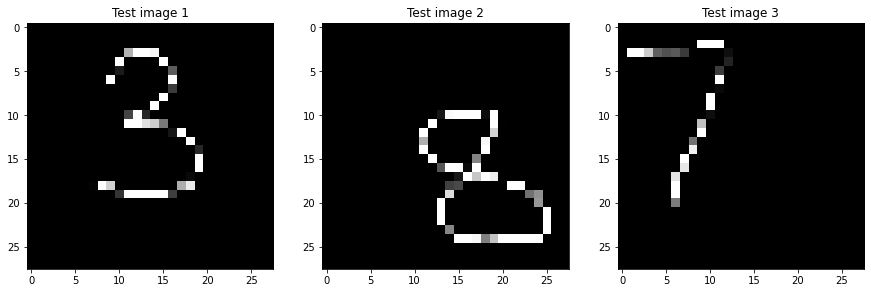

In [ ]:
# load the images
digit_imgs = []

for i in range(1,4):

  # load image
  img = cv2.imread('{0}test{1}.png'.format(path,i))

  # MNIST is in grayscale, so switch images to grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  # reshape to 28x28
  img = cv2.resize(img.astype(np.float32),(28,28))

  # digits in MNIST are white with black background so switch the images to white font
  img = 255 - img

  # normalize data
  img = img/np.max(img)

  digit_imgs.append(img)

# show the images
plt.figure(figsize=(15,15))
plt.subplot(131),plt.title("Test image 1"),plt.imshow(digit_imgs[0],cmap='gray')
plt.subplot(132),plt.title("Test image 2"),plt.imshow(digit_imgs[1],cmap='gray')
plt.subplot(133),plt.title("Test image 3"),plt.imshow(digit_imgs[2],cmap='gray')
plt.show()

**Information on the processing of the images:**

Here, we fetch the 3 testing handwritten digit. The first step in the processing these images is to change the color from BGR to grayscale since MNIST images are black and white. The second step consists in resizing the images to a size of 28x28 to be able to use the convolution neural network developped above (since MNIST consists of images of 28x28 of size). The images are then normalized between 0 and 1.

RESHAPE THE IMAGES

In [ ]:
# convert to tensor
digit_imgs = torch.tensor(digit_imgs).float()

# convert images to grayscale
gray_transform = transforms.Grayscale()
digit_imgs_gray = gray_transform(digit_imgs)

# reshape the images so to be able to pass to the CNN
digit_imgs = digit_imgs.reshape(-1,1,28,28)

print("shape of array after transformation: ",digit_imgs.shape)

shape of array after transformation:  torch.Size([3, 1, 28, 28])


CLASSIFY WITH FIRST CNN MODEL ABOVE (net MODEL)

In [ ]:
# move tensor to GPU
digit_imgs = digit_imgs.to(device)

# turn the model to the prediction mode
net.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():

  # pass images to network
  out = net(digit_imgs)
  _, predicted = torch.max(out.data, 1)

print("the predicted classes are: ",predicted)

the predicted classes are:  tensor([3, 2, 6])


DISCUSSION:

Here only one of the three digits is rightly interpreted (the number 3). The 2 other numbers are predicted to be 2 and 6 respectively, which is visually really different from the images above. We will try the networks with the 2 other activation functions:

CLASSIFYING WITH TANH NETWORK

In [ ]:
# turn the model to the prediction mode
net_tanH.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():

  # pass images to network
  out = net_tanH(digit_imgs)
  _, predicted = torch.max(out.data, 1)

print("the predicted classes are: ",predicted)

the predicted classes are:  tensor([3, 4, 4])


CLASSIFYING WITH GELU NETWORK

In [ ]:
# turn the model to the prediction mode
net_GELU.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():

  # pass images to network
  out = net_GELU(digit_imgs)
  _, predicted = torch.max(out.data, 1)

print("the predicted classes are: ",predicted)

the predicted classes are:  tensor([3, 2, 6])


**DISCUSSION:**

In all three models above, the testing accuracy on the 3 digit images is 1/3. Changing the activation function results in different predictions, but the accuracy stays the same. This is an indication that although our neural network model was trained on 60'000 images, it might not be the most efficient one for recognizing digits as it outputs multiple wrong predictions. To help improving the accuracy, the number of nodes in the final layer, the size of the convolution kernels, as well as other paramters could be varied.

***9. Implement a probabilistic classifier that makes a Naïve Bayes assumption for the likelihood. Assume that you have a uniform prior. Now using this classifier, infer (i.e. mention the posterior probability for each class) on the handwritten test image in figure 1. (You can use the numpy library to answer this sub-question (only for this sub-question))***

In [ ]:
# Information about how the Naive Bayes algorithm was found in the lecture notes, in LECTURE 12 (probabilistic inference)
# Additional information was found at those websites:
# https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
# https://analyticsindiamag.com/understanding-naive-bayes-classifier-from-scratch/

class NaiveBayes:

    def __init__(self, epsilon=1e-9):

      # small number to avoid dividing by zero later
      self.epsilon = epsilon

      self.priors = None

      # as in Lecture 12, the likelihood is completely characterized by the mean and variance
      self.means = None
      self.variances = None

    def fit(self, X, y, class_probabilities=None):

      # shapes of the features and classes
      num_classes = np.unique(y).shape[0]
      num_features = X.shape[1]

      # initialize arrays for the priors, means and variances
      self.priors = np.zeros(num_classes)
      self.means = np.zeros((num_classes, num_features))
      self.variances = np.zeros((num_classes,num_features))

      # compute class priors, mean vectors and variance vectors for each unique class
      for i, c in enumerate(np.unique(y)):

        # select subset of data that belongs to the class
        X_class = X[y == c]

        # class probabilities are used if given, otherwise, they are computed
        if class_probabilities is None:
            class_probability = X_class.shape[0] / X.shape[0]
        else:
            class_probability = class_probabilities[i]

        # probability of observing a training example from class C in the training data
        self.priors[i] = class_probability

        # mean value of each feature for class C
        self.means[i] = np.average(X_class, axis=0).astype(float)

      # variance value of each feature for class C, epsilon is to avoid division by zero
      self.variances = np.var(X_class, axis=0).astype(float) + self.epsilon

    def predict(self, X):

        # likelihood for each class
        numerator = np.exp(-0.5*((X-self.means)**2)/(2*self.variances))
        denominator = 1/(np.sqrt(2*np.pi*self.variances))
        likelihoods = numerator/denominator
        likelihoods_multiplied = np.prod(likelihoods, axis=1)

        # compute all posterior probabilities for all classes, epsilon is to avoiid division by zero
        posteriors = likelihoods_multiplied * self.priors
        normalized_posteriors = posteriors/np.sum(posteriors+self.epsilon)

        # return the highest probability for each input
        return (np.argmax(normalized_posteriors), normalized_posteriors)

In [ ]:
# get the X and Y data to train Naive Bayes
X_train = []
y_train = []

for batch_idx, (data, target) in enumerate(train_loader[0]):
  X_train.append(data.numpy().reshape((data.shape[0],-1)))
  y_train.append(target.numpy())

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

print("shape of training data: ", X_train.shape)
print("shape of testing data: ", y_train.shape)

shape of training data:  (60000, 784)
shape of testing data:  (60000,)


Test the Naive Bayes Classifier on the test images using a uniform prior:

In [ ]:
# create an instance of the Naive Bayes Classifier
NB = NaiveBayes()

# input a uniform prior
prior = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

# fit the data to the classifier
NB.fit(X_train,y_train,prior)

Predict the data:

In [ ]:
X_1 = np.array(digit_imgs[0]).reshape(-1)
X_2 = np.array(digit_imgs[1]).reshape(-1)
X_3 = np.array(digit_imgs[2]).reshape(-1)

pred1,_ = NB.predict(X_1)
pred2,_ = NB.predict(X_2)
pred3,_ = NB.predict(X_3)

print("the predicted classes are: ",pred1,pred2,pred3)

the predicted classes are:  0 0 0


***10. Show the effect of using class probability of the training sample ( probability of a class is the ratio of the frequency of occurrence of a class to the total number of outcomes) as prior in Naïve Bayes on the same test data. Report the posterior class probabilities after using this prior***

CALCULATE THE INDIVIDUAL CLASS PROBABILITIES:

In [ ]:
class_probs = np.zeros(10)

for sample,C in zip(X_train,y_train):
  class_probs[C] += 1
tot_length = X_train.shape[0]
class_probs /= tot_length
print(class_probs)

# make sure that the probabilities indeed add up to 1:
print("\n sum of all the probabilities: ",sum(class_probs))

[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]

 sum of all the probabilities:  1.0000000000000002


FIT THOSE CLASS PROBABILITIES TO THE NAIVE BAYES CLASSIFIER AS THE PRIOR:

In [ ]:
# create a new instance of the Naive Bayes Classifier:
NB_2 = NaiveBayes()

# fit the data
NB_2.fit(X_train,y_train, class_probs)

# now predict the data
pred1,p1 = NB_2.predict(X_1)
pred2,p2 = NB_2.predict(X_2)
pred3,p3 = NB_2.predict(X_3)

print("NAIVE BAYES PREDICTIONS FOR FREQUENCIES AS THE PRIOR: ",pred1,pred2,pred3)

NAIVE BAYES PREDICTIONS FOR FREQUENCIES AS THE PRIOR:  0 0 0


DISCUSSION ON THE EFFECT OF USING CLASS PROBABILITIES ON NAIVE BAYES:

Here, the Naive Bayes fails to recognize the digits and labels them as being the number 0. This is likely because it is not able to capture the structure in the data, as the convolution neural network does with the kernels and the maxpool layer. Inputing either the class probabilities or having a uniform prior does not change the predictions here.

***11. Using the trained CNN, detect (i.e., you have to display two digits in each image) the digits in 64 × 64 pixeled images (see figure 2) -‘detect1.png’, ‘detect2.png’ and ‘detect3.png’. Explain your results.***



LOAD AND PROCESS THE IMAGES:

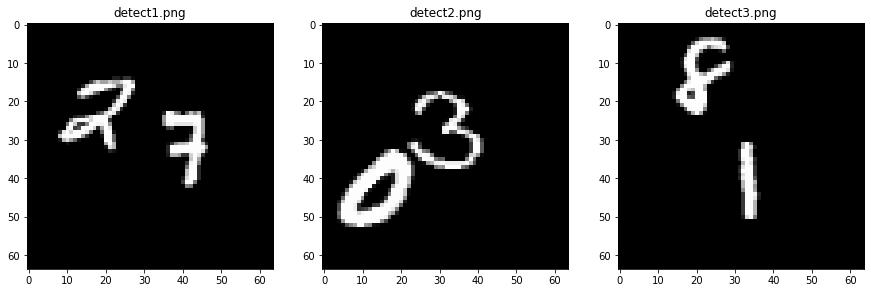

In [ ]:
# first load the testint images
detects = []
for i in range(1,4):
  img = cv2.imread('{0}detect{1}.png'.format(path,i))
  img = cv2.resize(img, (64,64))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  detects.append((img,gray))

# show the images
plt.figure(figsize=(15,15))
plt.subplot(131),plt.title("detect1.png"),plt.imshow((detects[0])[0], cmap='gray')
plt.subplot(132),plt.title("detect2.png"),plt.imshow((detects[1])[0], cmap='gray')
plt.subplot(133),plt.title("detect3.png"),plt.imshow((detects[2])[0], cmap='gray')
plt.show()

DETECT EACH DIGIT SEPARATELY IN THE IMAGES

(<Axes: title={'center': 'digit 6'}>,
 Text(0.5, 1.0, 'digit 6'),
 <matplotlib.image.AxesImage at 0x7f5652ed4eb0>)

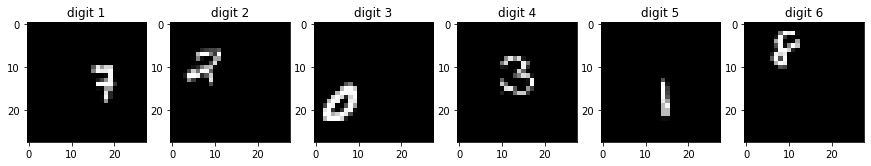

In [ ]:
# information about contour detection was found at the Geeks for Geeks page:
# https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/
# information about cv2.threshold was found at the openCV website
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# threshold the image
_, thresh1 = cv2.threshold((detects[0])[1], 127,255,cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold((detects[1])[1], 127,255,cv2.THRESH_BINARY)
_, thresh3 = cv2.threshold((detects[2])[1], 127,255,cv2.THRESH_BINARY)

# Find Canny edges
contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv2.findContours(thresh3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# define max area
min_area = 10
max_area = 2000

# Filter contours
filtered_contours1 = [cnt for cnt in contours1 if min_area < cv2.contourArea(cnt) < max_area]
filtered_contours2 = [cnt for cnt in contours2 if min_area < cv2.contourArea(cnt) < max_area]
filtered_contours3 = [cnt for cnt in contours3 if min_area < cv2.contourArea(cnt) < max_area]

# Extract each digit
single_digits = []

for i, cnt in enumerate(filtered_contours1):
  img = np.zeros(((detects[0])[1]).shape[:2])
  x,y,w,h = cv2.boundingRect(cnt)
  digit = ((detects[0])[1])[y:y+h, x:x+w]
  img[y:y+h, x:x+w] = digit
  img = cv2.resize(img,(28,28))
  single_digits.append(img)

for i, cnt in enumerate(filtered_contours2):
  img = np.zeros(((detects[1])[1]).shape)
  x,y,w,h = cv2.boundingRect(cnt)
  digit = ((detects[1])[1])[y:y+h, x:x+w]
  img[y:y+h, x:x+w] = digit
  img = cv2.resize(img,(28,28))
  single_digits.append(img)

for i, cnt in enumerate(filtered_contours3):
  img = np.zeros(((detects[2])[1]).shape)
  x,y,w,h = cv2.boundingRect(cnt)
  digit = ((detects[2])[1])[y:y+h, x:x+w]
  img[y:y+h, x:x+w] = digit
  img = cv2.resize(img,(28,28))
  single_digits.append(img)

# show all the digits
plt.figure(figsize=(15,15)),
plt.subplot(161),plt.title("digit 1"),plt.imshow(single_digits[0], cmap='gray')
plt.subplot(162),plt.title("digit 2"),plt.imshow(single_digits[1], cmap='gray')
plt.subplot(163),plt.title("digit 3"),plt.imshow(single_digits[2], cmap='gray')
plt.subplot(164),plt.title("digit 4"),plt.imshow(single_digits[3], cmap='gray')
plt.subplot(165),plt.title("digit 5"),plt.imshow(single_digits[4], cmap='gray')
plt.subplot(166),plt.title("digit 6"),plt.imshow(single_digits[5], cmap='gray')

STEPS ON THE PRE-PROCESSING OF THE DIGIT IMAGES:



*   images are first read from the Google drive foler
*   To ensure they are really of size 64x64, they are resized to this size
*   Images are converted to grayscale
*   Images are thresholded as binary with the function cv2.threshold() to later find the edges
*   using cv2.findContours(), potential contours in each images are found
*   a minimum and maximum window areas are used to filter out non-relevant contours
*   The contour of each individual digit is put back on a black image of the same size (64x64)
*   the digits are resized to 28x28









In [ ]:
# convert to tensor
single_digits = np.array(single_digits)
single_digits = torch.tensor(single_digits).float()

# reshape the images so to be able to pass to the CNN
single_digits = single_digits.reshape(-1,1,28,28)

print("shape of array after transformation: ",single_digits.shape)

shape of array after transformation:  torch.Size([6, 1, 28, 28])


CLASSIFY WITH THE VERY FIRST CNN

In [ ]:
# move tensor to GPU
single_digits = single_digits.to(device)

# turn the model to the prediction mode
net.eval()

total = 0.0
correct = 0.0

# turn off the gradient memory to save computations
with torch.no_grad():

  # pass images to network
  out = net(single_digits)
  _, predicted = torch.max(out.data, 1)

print("the predicted classes are: ",predicted)

the predicted classes are:  tensor([7, 7, 2, 9, 1, 7])


EXPLANATION:

In the above output, we can see that there are 2 numbers right on a total of 6 (2/6). However, the digits that are failed to be recognized are misinterpreted for numbers that look close visually. For example, the 'digit 2' image is predicted to be 7 and the 'digit 4' image is predicted to be 9. The 2 looks indeed like a 7 because of the low quality of the image (it is pixelated) and the number 3 is the closest number to a 9. The image 'digit 3' is interpreted to be a 2 whereas in reality, it is a 0. This is still a close error as the 2 has a curved shape a little bit like the 0. Digit 8 is interpreted as a 7, which in this case is a totally wrong interpretation.

***1.12 Discuss the limitations of your CNN in the context where you CNN will fail to recognize digits. Show any one example.***

In the previous detection, the CNN only rightly predicted 2 out of 4 handwritten digits and in the first experiment, it only predicted correctly 1 digit out of 3 images. In the first experiment, the digit images were bigger on the 28x28 image then in the second experiment. This may be a reason why the results were so bad in the first experiment. A possible source of analysis is that the size of the convolution kernels may make it easier to detect smaller number in a 28x28 image. The second experiment didn't have a high accuracy (2/6), but the misunterpreted results were still close visually. For example, the image of the digit 3 (digit 4 image) was predicted to be 9. This was indeed a close prediction as the two numbers were close visually because of the low quality of the image and the similar shape of the two digits.

# ***2. Stereo Vision - Epipolar Geometry***

LOAD THE IMAGES

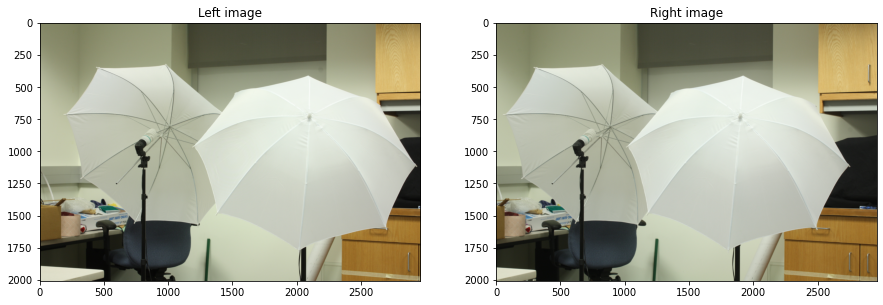

In [ ]:
# load the left image
left_image = cv2.imread(path+'im0.png')
left_image = cv2.cvtColor(left_image,cv2.COLOR_BGR2RGB)

# load the right image
right_image = cv2.imread(path+'im1.png',cv2.IMREAD_COLOR)
right_image = cv2.cvtColor(right_image,cv2.COLOR_BGR2RGB)

# display the two images
plt.figure(figsize=(15,15))
plt.subplot(121),plt.title("Left image"),plt.imshow(left_image)
plt.subplot(122),plt.title("Right image"),plt.imshow(right_image)
plt.show()

***2.1 Compute matching SIFT keypoints from a stereo image pair***

In [ ]:
# information on the knnMatch was found on the OpenCv website:
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
# additional information was also found at this website:
# https://www.andreasjakl.com/understand-and-apply-stereo-rectification-for-depth-maps-part-2/

# compute the SIFT keypoints and descriptors
sift = cv2.SIFT_create()
                                                                  # No mask
keypoints_left,descriptors_left = sift.detectAndCompute(left_image, None)
keypoints_right,descriptors_right = sift.detectAndCompute(right_image, None)

# use Brute-Force Matching
bfMatcher = cv2.BFMatcher(cv2.NORM_L2)
matches = bfMatcher.knnMatch(descriptors_left, descriptors_right, k=2)

# use ratio test to only store the best matches
ptsLeft = np.int32([keypoints_left[m.queryIdx].pt for i, (m,n) in enumerate(matches) if m.distance < 0.6*n.distance])
ptsRight = np.int32([keypoints_right[m.trainIdx].pt for i, (m,n) in enumerate(matches) if m.distance < 0.6*n.distance])

***2.2. Compute and display the epipolar lines for both images***

FUNCTION TO DRAW THE LINES BETWEEN THE TWO IMAGES:

In [ ]:
# function to draw the lines between the two images
def drawlines(img1, img2, lines, pts1, pts2, thickness=2):

    h, w, c = img1.shape

    for l, pt1, pt2 in zip(lines, pts1, pts2):

      # choose a random color for each line
      color = tuple(np.random.randint(0,255,3).tolist())

      # point 1
      x0, y0 = map(int, [0, -l[2] / l[1] ])
      # point 2
      x1, y1 = map(int, [w, -(l[2] + l[0] * w) / l[1] ])

      # draw lines and circles
      img1 = cv2.line(img1, (x0, y0), (x1, y1), color, thickness)
      img1 = cv2.circle(img1, tuple(pt1.astype(int)), 5, color, -1)
      img2 = cv2.circle(img2, tuple(pt2.astype(int)), 5, color, -1)

    return img1, img2

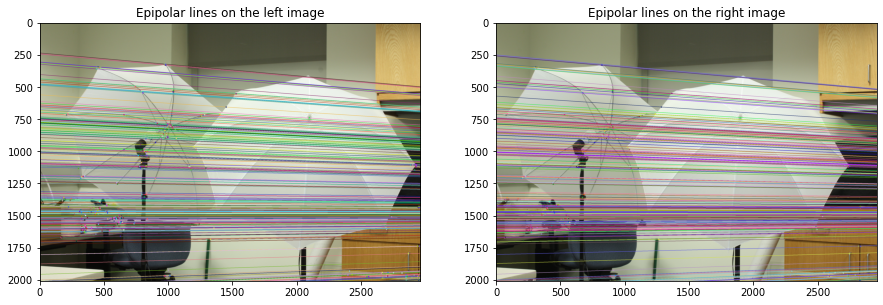

In [ ]:
# this source was used to understand epipolar constraints and transformation matrices:
# https://www.geeksforgeeks.org/python-opencv-epipolar-geometry/
# As well, tutorial 10 was used for reference

# find the fundamental matrix F using the least median algorithm
F, mask = cv2.findFundamentalMat(ptsLeft, ptsRight, cv2.FM_LMEDS)

# select only inlier points in the images
ptsLeft = ptsLeft[mask.ravel() == 1]
ptsRight = ptsRight[mask.ravel() == 1]

# Compute epilines for both images                                       # right img
left_lines = cv2.computeCorrespondEpilines(ptsRight, 2, F)
left_lines = left_lines.reshape(-1, 3)
                                                                         # left img
right_lines = cv2.computeCorrespondEpilines(ptsLeft, 1, F)
right_lines = right_lines.reshape(-1, 3)

# get the pixel coordinates of the keypoints
left_points = np.array([keypoints_left[i].pt for i in range(len(ptsLeft))]).astype(int)
right_points = np.array([keypoints_right[i].pt for i in range(len(ptsRight))]).astype(int)

# draw the corresponding lines in the images
imgLeft1, imgRight1 = drawlines(left_image, right_image, left_lines, ptsLeft, ptsRight)
imgRight2, imgLeft2 = drawlines(right_image, left_image, right_lines, ptsRight, ptsLeft)
# plot everything
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.title('Epipolar lines on the left image'), plt.imshow(imgLeft1)
plt.subplot(122), plt.title('Epipolar lines on the right image'), plt.imshow(imgRight2)
plt.show()

***2.3 Pick any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line. Extract a patch of size (5 × 5) around this keypoint in the left image.***

In [ ]:
good_matches = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good_matches.append(m)

# Choose a keypoint from the left image (let's pick index 0)
rand_kp = good_matches[0].queryIdx
left_kp = keypoints_left[rand_kp]

# Get the corresponding epipolar line in the right image
line = right_lines[rand_kp]

# Extract patch of size 5x5 around the chosen keypoint in the left image
x, y = np.int32(left_kp.pt)
patchL = left_image[y-2:y+3, x-2:x+3]

***2.4 4. Match the extracted patch to every 5 × 5 patch along the corresponding epipolar line in the right image. Use normalized cross-correlation metric for matching.***

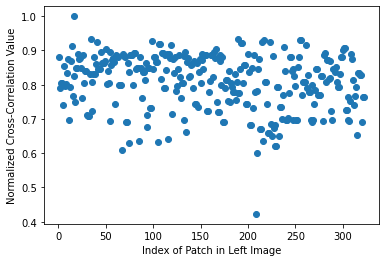

In [ ]:
# the OpenCv website was used to find information about the cv2.matchTemplate function:
# https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html


# Compute normalized cross-correlation metric for each patch along the epipolar line in the right image
correlations = []
indices = []
i=0
for line, ptR in zip(right_lines, right_points):
    i +=1

    # get the coordinates on the line
    x, y = int(ptR[0]), int(ptR[1])

    # get the 5x5 patch on right image
    patchR = right_image[y-2:y+3, x-2:x+3]

    corr = cv2.matchTemplate(patchR, patchL, cv2.TM_CCORR_NORMED)
    correlations.append(corr)
    indices.append(i)

# Plot normalized cross-correlation values against an index of the patch in the left image
plt.scatter(indices, correlations)
plt.xlabel('Index of Patch in Left Image')
plt.ylabel('Normalized Cross-Correlation Value')
plt.show()

FIND THE BEST 2 MATCHING POINTS IN THE TWO IMAGES:

the index of the best match between the two images is:  16
the coordinate of the best match in the left image is:  [ 308 1468]
the coordinate of the best match in the right image is:  [ 234 1468]


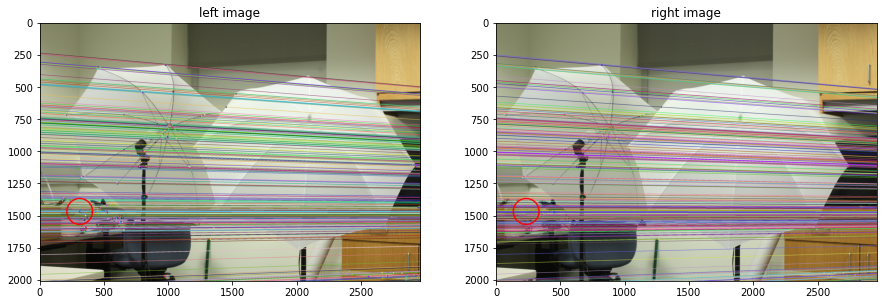

In [ ]:
# information about cv2.circle was found at the Geeks for geeks page:
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/

# Find the best match and its corresponding patch in the right image
bestMatchIndex = np.argmax(correlations)
bestMatchPatchR = right_image[int(right_points[bestMatchIndex][1])-2:int(right_points[bestMatchIndex][1])+3, int(right_points[bestMatchIndex][0])-2:int(right_points[bestMatchIndex][0])+3]

print("the index of the best match between the two images is: ",bestMatchIndex)
print("the coordinate of the best match in the left image is: ",ptsLeft[bestMatchIndex])
print("the coordinate of the best match in the right image is: ",ptsRight[bestMatchIndex])

circled1 = cv2.circle(left_image, ptsLeft[bestMatchIndex], 100, (255,0,0), 10)
circled2 = cv2.circle(right_image, ptsRight[bestMatchIndex], 100, (255,0,0), 10)

plt.figure(figsize=(15,15)),
plt.subplot(121),plt.title("left image"),plt.imshow(circled1)
plt.subplot(122),plt.title("right image"),plt.imshow(circled2)
plt.show()

ANALYSIS (ARE THE MATCHING POINTS THE CORRECT ONES?):

As showcased in the left and right images above, the matching keypoints are at close locations in both the left and right images and are on an epipolar line. This implies that our window search works correctly as the matching points are on an epipolar line. Since the two matches are at similar locations in the image, this means that the best matches are most probably correct as they track the same object along the epipolar line.

# **3. Motion Algorithm**

LOAD FRAME 1 AND FRAME 2

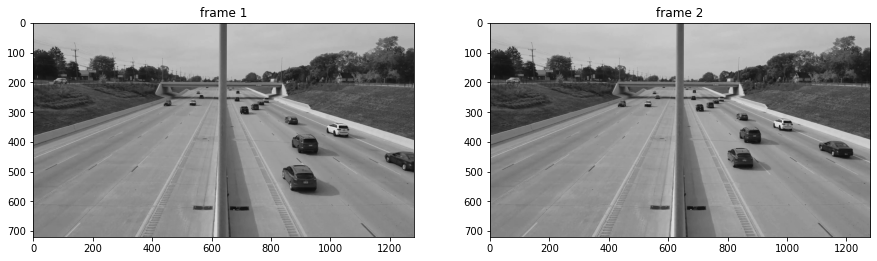

In [ ]:
# as in tutorial 11, the images are first loaded and converted to grayscale

# load the left image
frame1 = cv2.imread(path+'frame1.png')
frame1 = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
color1 = cv2.cvtColor(frame1, cv2.COLOR_GRAY2RGB)

# load the right image
frame2 = cv2.imread(path+'frame2.png')
frame2 = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
color2 = cv2.cvtColor(frame2, cv2.COLOR_GRAY2RGB)

# display the two image
plt.figure(figsize=(15,15))
plt.subplot(121),plt.title("frame 1"),plt.imshow(frame1, cmap='gray')
plt.subplot(122),plt.title("frame 2"),plt.imshow(frame2, cmap='gray')
plt.show()

***3.1 Extract good points to track from ‘frame1.png’ using Harris corner detection algorithm. Use openCV function goodFeaturesToTrack and set parameter value maxCorners=500. Search optimal values for the rest of the parameters. Let us call the detected set of points: p1.***

In [ ]:
# information about the goodFeaturesToTrack function was taken from the OpenCV website:
# https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html
# More information on motion tracking was found in Tutorial 11

# define the parameters for the goodFeaturesToTrack function
max_corners = 500
quality_level = 0.01
min_distance = 10

# extract points from frame 1
good_points_to_track = cv2.goodFeaturesToTrack(frame1, max_corners, quality_level, min_distance)

***3.2 Compute the optical flow between ‘frame1.png’ and ‘frame2.png’ at the points in p1. Use the openCV function calcOpticalFlowPyrLK. Search for optimal values for the parameters. Note that the function calcOpticalFlowPyrLK returns nextPts (a set of shifted positions of each point in p1 which we refer as p2), status (whether the search of shifted position is successful or not) and err (error measure between p1 and p2). Please read the manual for more details)***

In [ ]:
# information about calcOpticalFlowPyrLK was found on the GeeksforGeeks website:
# https://www.geeksforgeeks.org/python-opencv-optical-flow-with-lucas-kanade-method/
# information about the calcOpticalFlow function was found at the link shown in the assignment PDF:
# https://docs.opencv.org/2.4/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowpyrlk

# parameters for the Lucas-Kanade Algorithm:
# param 1: window size
# param 2: maximum number of pyramid levels
# param 3: termination criteria
                                                             # either max. iter. (10) or min. err. threshold (0.03)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# parameters returned by calcOpticalFlowPyrLK:
# out1: a set of shifted positions of each point in p1 which we refer as p2
# out2: whether the search of shifted position is successful or not
# out3: error measure between p1 and p2
shifted_points, status, error = cv2.calcOpticalFlowPyrLK(frame1, frame2, good_points_to_track, None, **lk_params)

***3.3 Display the optical flow image***

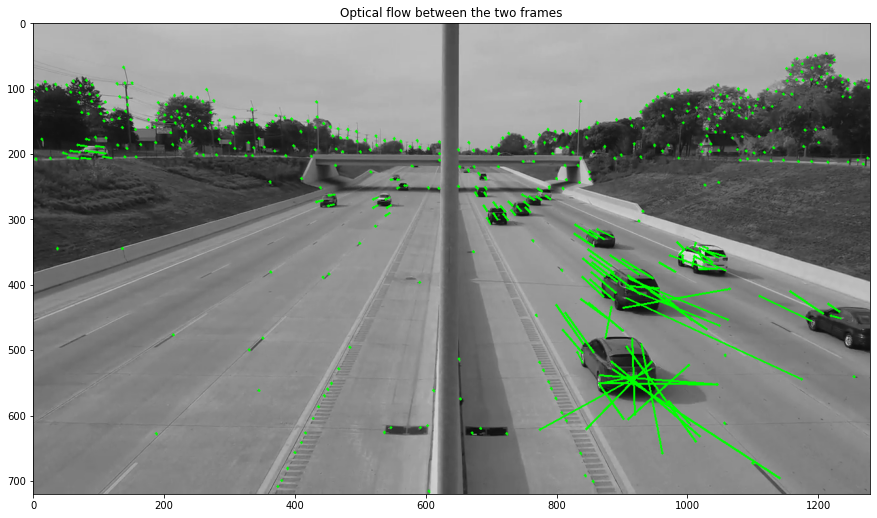

In [ ]:
# create a mask image to display the optical flow vectors
mask = color1.copy()

# draw the optical flow vectors onto the mask image
for i, (p1, p2) in enumerate(zip(good_points_to_track, shifted_points)):
  x1, y1 = p1.ravel()
  x2, y2 = p2.ravel()

  # only draw the good points
  if (status[i])[0] == 1:
    mask = cv2.line(mask, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    mask = cv2.circle(mask, (int(x2), int(y2)), 2, (0, 255, 0), -1)

# display the optical flow image
plt.figure(figsize=(15,15)),
plt.title("Optical flow between the two frames"),
plt.imshow(mask)

***3.4 Vary the maximum pyramid level from 0 to 10 (in steps of 1) in the function
calcOpticalFlowPyrLK. For each setting, compute the mean of the error at those points whose correspondence search is successful i.e. returned status is 1. Plot the mean (on y-axis) vs. pyramid level (on the x-axis). Discuss the trends you observe in the plot***

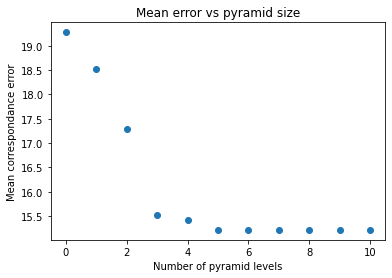

In [ ]:
# function to vary the number of pyramid levels:

def vary_Pyramid_levels():

  mean_err = []
  output_params = []

  for i in range(11):
    # param 2: maximum number of pyramid levels
                                                                # either max. iter. (10) or min. err. threshold (0.03)
    lk_params = dict(winSize=(15, 15), maxLevel=i, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # parameters returned by calcOpticalFlowPyrLK:
    # out1: a set of shifted positions of each point in p1 which we refer as p2
    # out2: whether the search of shifted position is successful or not
    # out3: error measure between p1 and p2
    shifted_points, status, error = cv2.calcOpticalFlowPyrLK(frame1, frame2, good_points_to_track, None, **lk_params)

    # add the mean error to the array
    global_error = 0
    num = 0
    for e,stat in zip(error,status):
      if stat == 1:
        global_error += e
        num += 1
    mean_err.append(global_error/num)
    output_params.append((shifted_points,status))

  return mean_err, output_params


# call the function and plot everything:
y,output_params = vary_Pyramid_levels()
x = np.arange(11)

plt.title("Mean error vs pyramid size"), plt.scatter(x, y),
plt.xlabel("Number of pyramid levels")
plt.ylabel("Mean correspondance error")
plt.show()

**DISCUSSION:**

As showcased in the plot above, the correspondance error between matching points decreases in a negative exponential fashion as the number of pyramid levels increases. This is exactly what we would expect as with a higher number of pyramids, we are able to track the larger scale movements in the image. This means that the overall mean correspondance error necessarily decreases with the number of pyramids.

**Source:** Lecture Notes (Motion Analysis)

***5. Display the optical flow for each setting of the maximum pyramid level. Comment on the quality of the results.***

In [ ]:
# create a function to show the optical flow:
def show_Optical_Flow(image1, frame1, points_to_track, params_array):

  # store all the masks
  masks_array = []

  # circle through all the pyramids
  for i in range(11):

    pts_shifted, err_stat = params_array[i]
    masks_array.append(image1.copy())

    # draw the optical flow vectors onto the mask image
    for j, (p1, p2) in enumerate(zip(points_to_track, pts_shifted)):
      x1, y1 = p1.ravel()
      x2, y2 = p2.ravel()

      # if correspondance between the points, show them
      if (err_stat[i])[0] == 1:
        masks_array[i] = cv2.line(masks_array[i], (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        masks_array[i] = cv2.circle(masks_array[i], (int(x2), int(y2)), 2, (0, 255, 0), -1)

  return masks_array

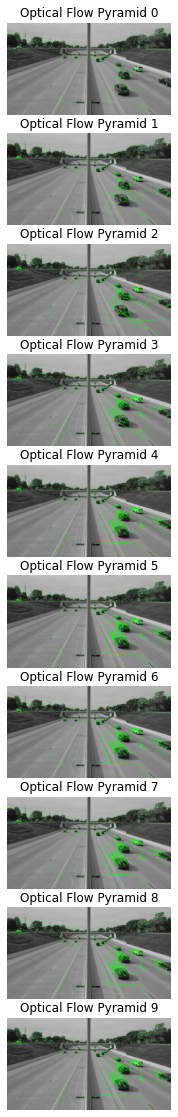

In [ ]:
# call the function
masks_array = show_Optical_Flow(color1, frame1,good_points_to_track, output_params)

def plot_images(images):
    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 20))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.set_title('Optical Flow Pyramid {0}'.format(i)),
            ax.imshow(images[i],cmap='gray')
            ax.axis('off')
    plt.show()

plot_images(masks_array)

**COMMENT ON THE QUALITY OF THE RESULTS:**

The output of 3.5 shows that in the image with a pyramid level of 0, a lot of features are not tracked since the Lukas-Kanade method isn't able to track bigger movements in the image. However, as the number of pyramids increases, we can see a significant difference on the quantity of features tracked. This augmentation in the number of tracked features is non-negligeable until a pyramid level of 5. After this, it becomes hard to visually see a real difference between the optical flow from images of taller pyramids. This is in perfect agreement with the error plot shown in 3.4, where there is no big decrease in the error for subsequent pyramids after a pyramid level of 5.

**Additional source:** Lecture Notes (Motion Analysis)